### Liquor Sales Predictor
#### Predicts the sale by product category given future month and day.

In [1]:
#Load the dataset file
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# Loads the large 13MM record file
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_e0d982f9f7984059b4c6b128d1814552 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='PkAbaFpfA7qkLJYNcF1OasbQWapxuH6P-vycQqiofFvK',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e0d982f9f7984059b4c6b128d1814552.get_object(Bucket='cnn-donotdelete-pr-4iz30eoowmkw91',Key='Iowa_Liquor_Sales.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#insert credentials for file - Change to credentials_1
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IBM_API_KEY_ID': 'PkAbaFpfA7qkLJYNcF1OasbQWapxuH6P-vycQqiofFvK',
    'IAM_SERVICE_ID': 'iam-ServiceId-a42a0a9d-b15f-482d-8ad4-7f333af35771',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.ng.bluemix.net/oidc/token',
    'BUCKET': 'cnn-donotdelete-pr-4iz30eoowmkw91',
    'FILE': 'liqSales.csv'
}
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
# Make sure this uses the variable above. The number will vary in the inserted code.
try:
    credentials = credentials_1
except NameError as e:
    print('Error: Setup is incorrect or incomplete.\n')
    print('Follow the instructions to insert the file credentials above, and edit to')
    print('make the generated credentials_# variable match the variable used here.')
    raise
    
# reference using String
#cols = ['Date', 'Category Name', 'Item Description', 'Sale (Dollars)', 'Volume Sold (Liters)']
#df = pd.read_csv(body, usecols=cols)

#df.head()
#count rows and slice into smaller chunk
#df['Date'].count()
#df.dtypes

13948103

In [2]:
#df.head()

,Date,Category Name,Item Description,Sale (Dollars),Volume Sold (Liters)
0,11/20/2015,NaN,Templeton Rye w/Flask,$162.84,4.50
1,11/21/2015,NaN,Templeton Rye w/Flask,$325.68,9.00
2,11/16/2015,NaN,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,$19.20,0.30
3,11/04/2015,NaN,Knob Creek w/ Crystal Decanter,$160.02,5.25
4,11/17/2015,NaN,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,$19.20,0.30


In [3]:
#df_short = df.iloc[0:1000000]
#df_short.index

RangeIndex(start=0, stop=1000000, step=1)

In [4]:
#df_short.head()

,Date,Category Name,Item Description,Sale (Dollars),Volume Sold (Liters)
0,11/20/2015,NaN,Templeton Rye w/Flask,$162.84,4.50
1,11/21/2015,NaN,Templeton Rye w/Flask,$325.68,9.00
2,11/16/2015,NaN,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,$19.20,0.30
3,11/04/2015,NaN,Knob Creek w/ Crystal Decanter,$160.02,5.25
4,11/17/2015,NaN,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,$19.20,0.30


In [5]:
#Build the df based on selected columns
#df_short['Sale (Dollars)'] = df_short['Sale (Dollars)'].str.replace('$', '')
#df_short['Sale (Dollars)'] = df_short['Sale (Dollars)'].astype(float)
#df_short.head()

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [37]:
#Rename Fields to simplify
#df_short.rename(columns={'Sale (Dollars)': 'sales'}, inplace=True)
#df_short.rename(columns={'Volume Sold (Liters)': 'volume'}, inplace=True)
#df_short.rename(columns={'Category Name': 'categoryName'}, inplace=True)
#df_short.rename(columns={'Date': 'date'}, inplace=True)
#df_short.rename(columns={'Item Description': 'item'}, inplace=True)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [38]:
#convert the df Date text to datetime field
#import dateutil
#df_short['date'] = df_short['date'].apply(dateutil.parser.parse, dayfirst=True)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [39]:
#The largest sale possible
#df_short['sales'].max()

196004.88

In [40]:
#The largest sale possible
#df_short['volume'].max()

11124.0

In [41]:
#Print df_short detailss
#df_short.index
#df_short['date'].count()

1000000

In [42]:
#df_short.head()

,date,categoryName,item,sales,volume
0,2015-11-20,NaN,Templeton Rye w/Flask,162.84,4.50
1,2015-11-21,NaN,Templeton Rye w/Flask,325.68,9.00
2,2015-11-16,NaN,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,19.20,0.30
3,2015-04-11,NaN,Knob Creek w/ Crystal Decanter,160.02,5.25
4,2015-11-17,NaN,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,19.20,0.30


In [43]:
#Save to csv file at object storage
cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])

# Build the enriched file name from the original filename.
localfilename = 'enriched_' + credentials['FILE']

# Write a CSV file from the enriched pandas DataFrame.
#df_short.to_csv(localfilename, index=False)

# Use the above put_file method with credentials to put the file in Object Storage.
#cos.upload_file(localfilename, Bucket=credentials['BUCKET'],Key=localfilename)

In [44]:
!ls -alt "../work"

total 60752
-rw-r----- 1 dsxuser dsxuser 62201188 Jun  3 01:47 enriched_liqSales.csv
drwxr-x--- 2 dsxuser dsxuser     4096 Jun  3 01:27 .
drwx------ 1 dsxuser dsxuser     4096 Jun  3 00:26 ..


In [45]:
# Loading the shortened file into panda dataframe
fileLoc = "../work/enriched_liqSales.csv"
dfs = pd.read_csv(fileLoc)
dfs.index

RangeIndex(start=0, stop=1000000, step=1)

In [46]:
#Print the total count of dfs
dfs['date'].count()

1000000

In [48]:
dfs.head()

,date,categoryName,item,sales,volume
0,2015-11-20,NaN,Templeton Rye w/Flask,162.84,4.50
1,2015-11-21,NaN,Templeton Rye w/Flask,325.68,9.00
2,2015-11-16,NaN,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,19.20,0.30
3,2015-04-11,NaN,Knob Creek w/ Crystal Decanter,160.02,5.25
4,2015-11-17,NaN,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,19.20,0.30


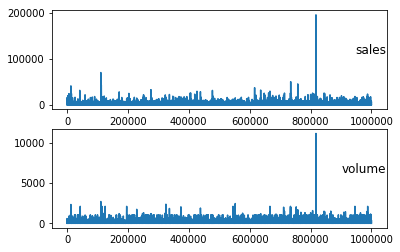

In [50]:
from matplotlib import pyplot
# load dataset
values = dfs.values
# specify columns to plot
groups = [3,4]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dfs.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [ ]:
#Build the LSTM model
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)